# Quick book glancer

As a linguistic book editor, this tool is to give me the first impressions of the new job.

In [1]:
import random

#upload new book here
text = "sources/rur.txt"
text_cs = "sources/rur_cs.txt" 

def open_book(book):
    with open(book, "r", encoding='utf-8') as text:
        content = text.read()
        return content
        
content = open_book(text)
content_cs = open_book(text_cs)
    
#print random middle part of the book and translation
def middle_slice(book):
        random_words = random.randint(round(len(book)/4), round(len(book) - len(book)/4))
        return book[random_words:random_words+600]
       
print("SOME RANDOM PART OF THE BOOK\n", middle_slice(content),
      "\n\n*******************************\n",
      "SOME RANDOM PART OF THE TRANSLATION\n", middle_slice(content_cs))


SOME RANDOM PART OF THE BOOK
 .

HELENA. But if you thought you saw the destruction of mankind coming
upon us--

ALQUIST. I _do_ see it.

HELENA. You mean mankind will be destroyed?

ALQUIST. It’s bound to be unless--unless.

HELENA. What?

ALQUIST. Nothing. (_Pats her shoulder. Rises_) Goodbye. (_Exits L.2._)

HELENA. (_Rises. Calling_) Nana, Nana! (_NANA enters L.1._) Is Radius
still there?

NANA. (_L.C._) The one who went mad? They haven’t come for him yet.

HELENA. Is he still raving?

NANA. No. He’s tied up.

HELENA. Please bring him here.

NANA. What?

HELENA. At once, Nana. (_Exits NANA L.1. HELENA to telephone_) He 

*******************************
 SOME RANDOM PART OF THE TRANSLATION
 min: Ano, až přijdu. Sbohem, Heleno. (běží kvapem nalevo) Nechoď ven!

Helena: (sama) Ó bože, co se děje? Náno! Náno, honem!

Nána: (vyjde zprava) No, co zas?

Helena: Náno, najdi poslední noviny! Rychle! V pánově ložnici!

Nána: No hned. (odejde vlevo)

Helena: Co se jen, proboha, děje? Nic, nic

### Getting some basic stats

In [2]:
length = round(len(content_cs)/1800)
rate_czk = 100

print('ESTIMATED NUMBER OF STANDARD PAGES - translation:')
print(length)
print('ESTIMATED COMPENSATION:')
print(str(length * rate_czk) + " CZK")

ESTIMATED NUMBER OF STANDARD PAGES - translation:
65
ESTIMATED COMPENSATION:
6500 CZK


### Getting better clue about the book

In [3]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

import matplotlib.pyplot as plt, seaborn as sns

lemmatizer = WordNetLemmatizer()

#some data cleaning
#tokenizing text + removing stopwords + lemmatizing

tokens = word_tokenize(content)
stops = stopwords.words('english') + ['said', 'saw', 'see']
clean_tokens = [token for token in tokens if token.lower() not in stops and token.isalnum()]
lemmas = [lemmatizer.lemmatize(token) for token in clean_tokens]
tagged = pos_tag(lemmas)

#some extra cleaning
#filtering only common nouns, adjectives and verbs

value_tags = ['NN', 'NNS', 'JJ', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
value_words = [word[0] for word in tagged if word[1] in value_tags]

freq = FreqDist(value_words)

#printing most common words

print('SOME MOST COMMON WORDS FROM THE BOOK\n')
print(freq.most_common(30))

SOME MOST COMMON WORDS FROM THE BOOK

[('u', 78), ('know', 58), ('table', 53), ('go', 49), ('year', 42), ('man', 42), ('hand', 37), ('factory', 36), ('come', 35), ('make', 35), ('world', 32), ('human', 31), ('good', 28), ('work', 28), ('want', 28), ('think', 28), ('window', 27), ('look', 27), ('everything', 27), ('take', 25), ('life', 25), ('say', 25), ('room', 24), ('old', 23), ('thing', 23), ('cross', 23), ('nothing', 22), ('desk', 22), ('chair', 22), ('stage', 21)]


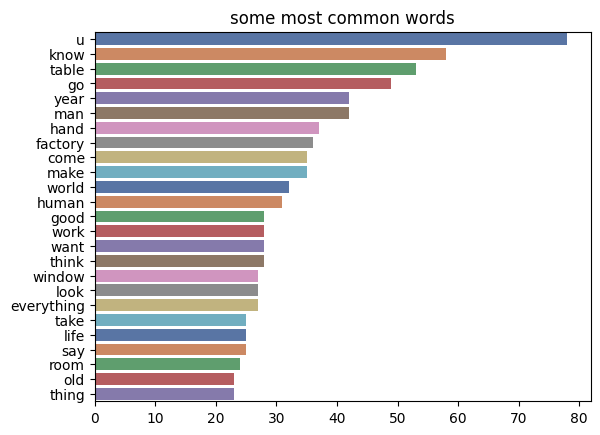

In [4]:
#plotting into bars
freq_dct_commons = dict(freq.most_common(25))

sns.barplot(x=list(freq_dct_commons.values()), y=list(freq_dct_commons.keys()), palette="deep", orient='h')
plt.title('some most common words')
plt.show()

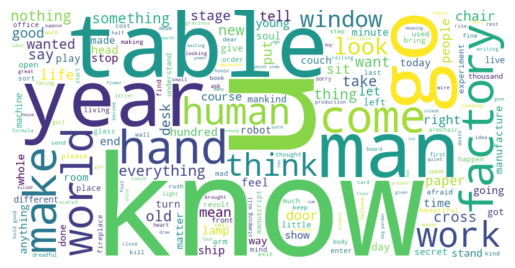

In [5]:
#as a word cloud
from wordcloud import WordCloud

text = " ".join(value_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[('human being', 17), ('stamping mill', 8), ('hold good', 7), ('beg pardon', 6), ('point view', 6), ('dissecting room', 6), ('school book', 5), ('hate u', 5), ('old man', 4), ('test tube', 4), ('let go', 4), ('want master', 4), ('hand hand', 4), ('young man', 3), ('year year', 3), ('beg acknowledge', 3), ('acknowledge receipt', 3), ('receipt order', 3), ('manufacture artificial', 3), ('couch sits', 3)] 



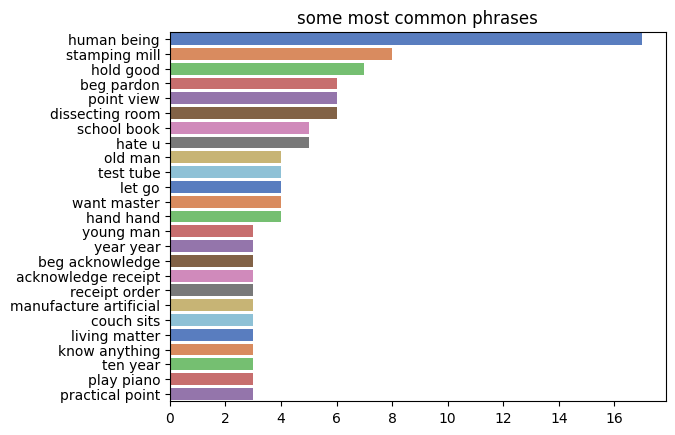

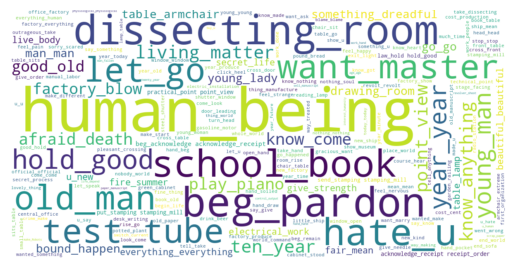

In [6]:
#experimenting with bigrams

from nltk.util import ngrams

#creating bigrams: 2word phrases + their frequency

bigrams = list(ngrams(value_words, 2))
joined_grams = [" ".join(gram) for gram in bigrams]
grammy_freq = FreqDist(joined_grams)

freq_bigrams = dict(FreqDist(bigrams))
print(grammy_freq.most_common(20), '\n')

#plotting them into bars

freq_dct_commons = dict(grammy_freq.most_common(25))

sns.barplot(x=list(freq_dct_commons.values()), y=list(freq_dct_commons.keys()), palette="muted", orient='h')
ax = plt.subplot()
plt.title('some most common phrases')
plt.show()

#plotting underscored phrases into word cloud
grams_conc = ["_".join(gram) for gram in bigrams]
text = " ".join(grams_conc)

wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Checking on my deadlines

In [7]:
import pandas as pd
from datetime import datetime, timedelta

schedule = pd.read_csv('sources/schedule.csv')

#defining steps
editing2 = schedule[schedule.Popis == "Finální redakce"]
proof = schedule[schedule.Popis == "Korektura 1"]

#date converter
def convert_date(step):
    start = step.iloc[0]['Od']
    end = step.iloc[0]['Do']
    start_formatted = datetime.strptime(start, "%d.%m.%Y").date()
    end_formatted = datetime.strptime(end, "%d.%m.%Y").date()
    return start_formatted, end_formatted

#counting days booked for given workflow without weekends
def count_weekdays(step):
    start, end = convert_date(step)
    days = (end - start).days
    weekdays = [day for day in range(days) if (start + timedelta(days=day)).weekday() < 5]
    return len(weekdays)

#counting average number of pages to do per day if I'm to meet deadlines
def pages_per_day(step):
    return round(length/count_weekdays(step), 2)
    
print(f'For second editing, you got {pages_per_day(editing2)} standard pages per day to edit.')
print(f'For proofreading, you got {pages_per_day(proof)} standard pages per day to read.')

For second editing, you got 2.17 standard pages per day to edit.
For proofreading, you got 3.1 standard pages per day to read.


#### I don't really care for standard pages - option to calculate Word or DTP pages manually:

In [8]:
def common_pages_day(total_pages, step):
    return round(float(total_pages)/count_weekdays(step), 2)

pages = common_pages_day(input('How many pages? '), editing2)
print(f'For second editing, you got {pages} Word pages per day to edit.')
pages_proof = common_pages_day(input('How many pages? '), proof)
print(f'For proofreading, you got {pages_proof} printed pages per day to read.')

How many pages?  250


For second editing, you got 8.33 Word pages per day to edit.


How many pages?  250


For proofreading, you got 11.9 printed pages per day to read.
